### 데이터 합치기


In [ ]:
merge_data = pd.merge(df_all, df_grdp)
merge_data.head()

### 컬럼명 변경

In [ ]:
merge_data= merge_data.rename(columns={'Unnamed: 0' : '경기도시/군/구'})
merge_data.head()

### 인덱스를 컬럼명으로 변경

In [67]:
df_set = merge_data.set_index('경기도시/군/구')
df_set.head()

,쏘카존수,녹지,주거,공업,상업,인구,대학교 개수,아파트수,GRDP
경기도시/군/구,,,,,,,,,
가평군,7,1.000000,0.000000,0.0,0.000000,62197,1,39,2977
고양시 덕양구,48,0.656250,0.343750,0.0,0.000000,487874,6,274,2048
고양시 일산동구,51,0.461538,0.461538,0.0,0.076923,296590,1,133,2048
고양시 일산서구,29,0.500000,0.375000,0.0,0.125000,290738,0,140,2048
과천시,3,0.500000,0.500000,0.0,0.000000,77775,1,15,7243


In [28]:
# Plotly 
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBClassifier
from sklearn.cluster import KMeans

from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, classification_report
from sklearn.feature_selection import RFE, SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler, StandardScaler, normalize
from sklearn.decomposition import PCA 

import scipy.cluster.hierarchy as shc

from scipy.stats import pearsonr, chi2_contingency
from itertools import combinations

import warnings
warnings.filterwarnings('ignore')

In [30]:
import seaborn as sns 

### 변수들관의 관계

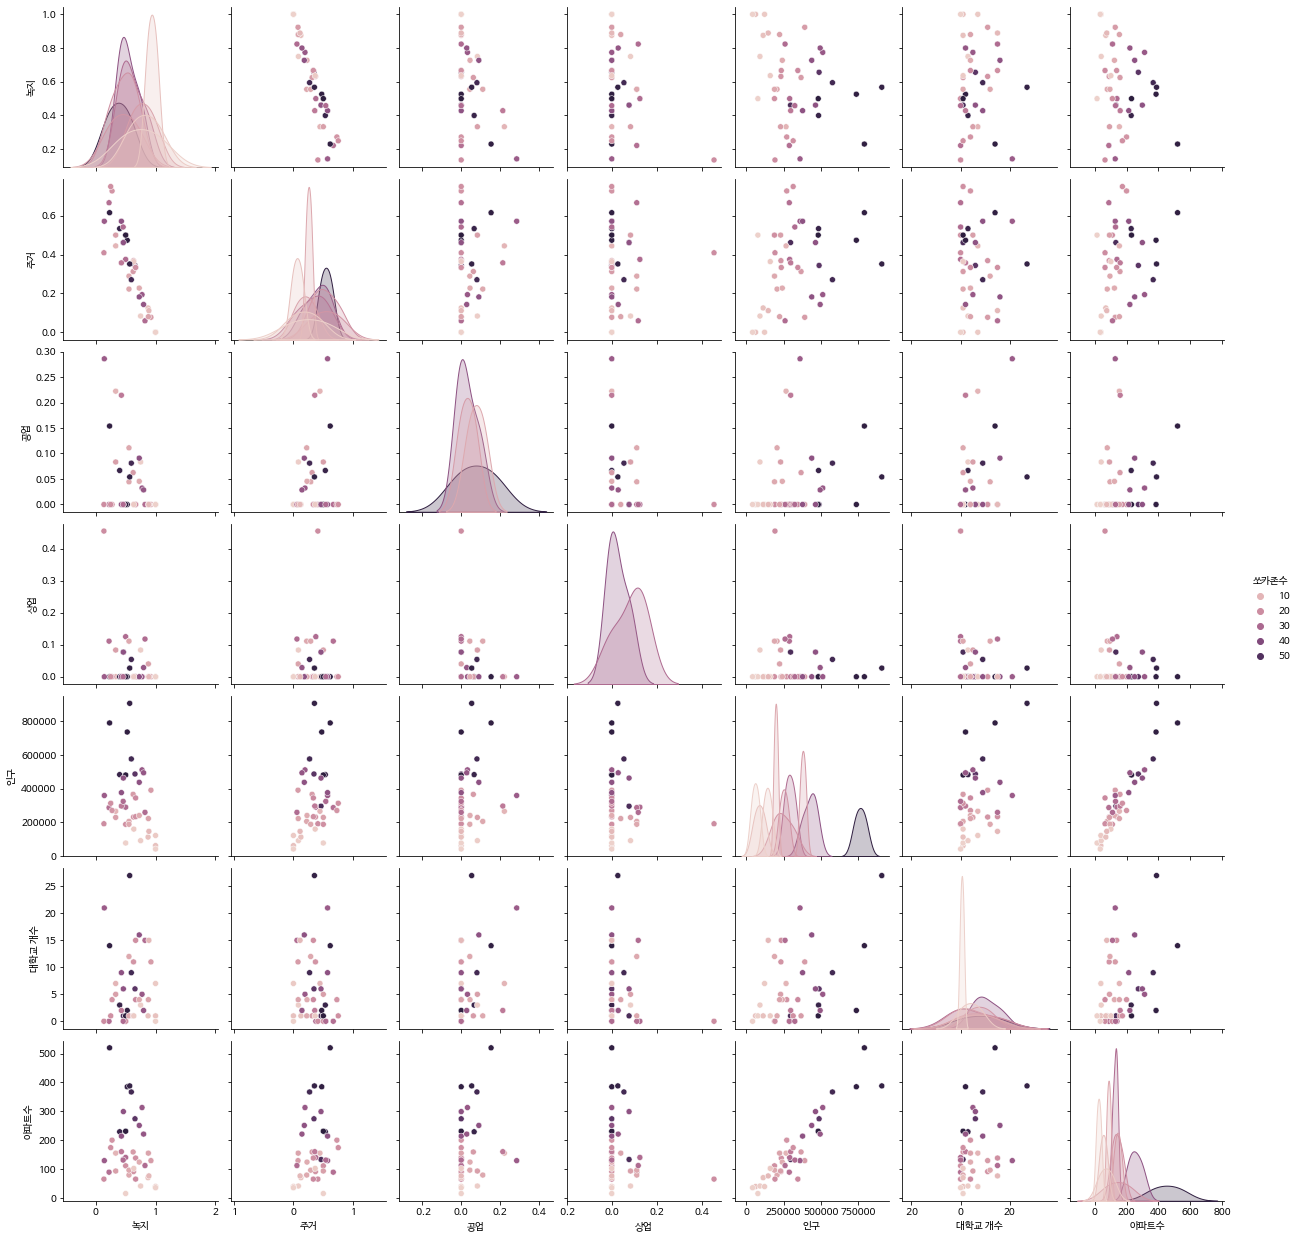

In [50]:
hue = '쏘카존수'
sns.pairplot(merge_data.select_dtypes(include=np.number), hue=hue)
plt.show()

In [68]:
df_set.nunique().sort_values()

상업        11
공업        16
대학교 개수    16
쏘카존수      29
녹지        31
GRDP      31
주거        34
아파트수      38
인구        42
dtype: int64

In [69]:
df_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42 entries, 가평군 to 화성시
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   쏘카존수    42 non-null     int64  
 1   녹지      42 non-null     float64
 2   주거      42 non-null     float64
 3   공업      42 non-null     float64
 4   상업      42 non-null     float64
 5   인구      42 non-null     int64  
 6   대학교 개수  42 non-null     int64  
 7   아파트수    42 non-null     int64  
 8   GRDP    42 non-null     int64  
dtypes: float64(4), int64(5)
memory usage: 3.3+ KB


## 피어슨 R: 숫자형 feature

### 방법1

In [ ]:
num_feat = df_set.columns.values

comb_num_feat = np.array(list(combinations(num_feat, 2)))
corr_num_feat = np.array([])
for comb in comb_num_feat:
    corr = pearsonr(df_set[comb[0]], df_set[comb[1]])[0]
    corr_num_feat = np.append(corr_num_feat, corr)
    print(corr_num_feat)

- 절대값이 0.9 이상

In [73]:
high_corr_num = comb_num_feat[np.abs(corr_num_feat) >= 0.9]
high_corr_num

array([['녹지', '주거'],
       ['인구', '아파트수']], dtype='<U6')

In [74]:
high_corr_num = comb_num_feat[np.abs(corr_num_feat) >= 0.7]
high_corr_num

array([['쏘카존수', '인구'],
       ['쏘카존수', '아파트수'],
       ['녹지', '주거'],
       ['인구', '아파트수']], dtype='<U6')

In [75]:
high_corr_num = comb_num_feat[np.abs(corr_num_feat) >= 0.5]
high_corr_num

array([['쏘카존수', '인구'],
       ['쏘카존수', '아파트수'],
       ['녹지', '주거'],
       ['인구', '아파트수']], dtype='<U6')

### 방법2


In [76]:
# plotly 안 보이는 문제 해결

import plotly.io as pio
pio.renderers.default = 'notebook_connected'
pio.renderers
pio.renderers.default = 'colab'
pio.renderers

data = [
    go.Heatmap(
        z=df_set.astype(float).corr().values, # 피어슨 상관계수
        x=df_set.columns.values,
        y=df_set.columns.values,
        colorscale='Viridis',
        reversescale = False,
        opacity = 1.0
        
    )
]


layout = go.Layout(
    title='숫자형 Feature 들의 피어슨 상관계수',
    xaxis = dict(ticks='', nticks=36),
    yaxis = dict(ticks='' ),
    width = 900, height = 700,
    
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='labelled-heatmap')



> 서로와 서간의 상관관계는 1 대각선으로 노란색
  

## seabone으로 보면 수치까지 확인할수 있다

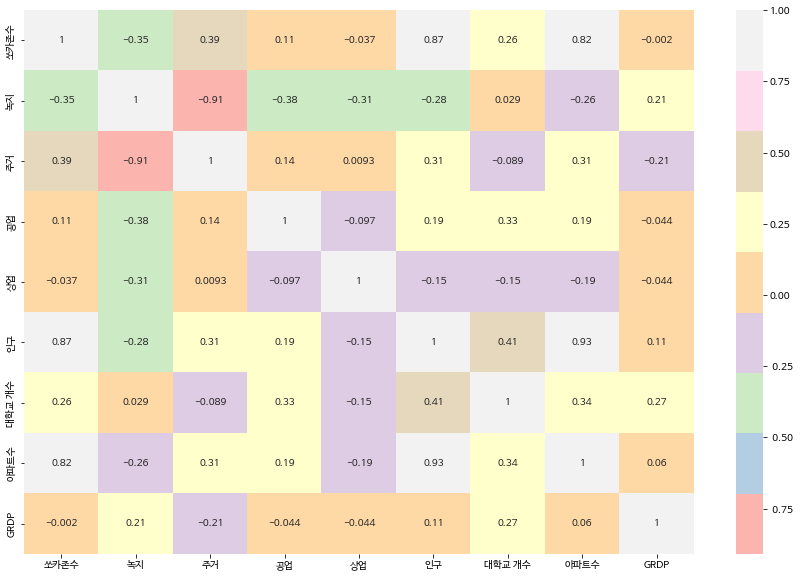

In [78]:
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(df_set.corr(),annot=True,cmap='Pastel1')